In [3]:
import os

# Create folder if it doesn't exist
os.makedirs("data/raw", exist_ok=True)


In [4]:
import requests
import pandas as pd
import os
import time

# Create folder
os.makedirs("data/raw", exist_ok=True)

# User-Agent header
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Empty list to store players
all_players = []

# Loop for 1000 players (100 per page)
for offset in range(0, 1000, 100):
    print(f"Fetching players {offset}–{offset+99}...")
    url = f"https://drop-api.ea.com/rating/ea-sports-fc?locale=en&limit=100&offset={offset}"
    res = requests.get(url, headers=headers)

    if res.status_code != 200:
        print(f"Error at offset {offset}: {res.status_code}")
        break

    players = res.json().get("items", [])

    if not players:
        print("No more data found.")
        break

    all_players.extend(players)
    time.sleep(1)  # Respect the server

# Convert to DataFrame
df = pd.json_normalize(all_players)

# Save to CSV
df.to_csv("data/raw/fifa25_top1000.csv", index=False)

print(f"\n✅ Scraped {len(df)} players and saved to 'data/raw/fifa25_top1000.csv'")
print(df.head())


Fetching players 0–99...
Fetching players 100–199...
Fetching players 200–299...
Fetching players 300–399...
Fetching players 400–499...
Fetching players 500–599...
Fetching players 600–699...
Fetching players 700–799...
Fetching players 800–899...
Fetching players 900–999...

✅ Scraped 1000 players and saved to 'data/raw/fifa25_top1000.csv'
       id  rank  overallRating firstName            lastName      commonName  \
0  231747     1             91    Kylian              Mbappé            None   
1  231866     2             91   Rodrigo  Hernández Cascante           Rodri   
2  241667     3             91    Aitana       Bonmatí Conca  Aitana Bonmatí   
3  239085     4             91    Erling             Haaland            None   
4  252371     5             90      Jude          Bellingham            None   

                birthdate  height  skillMoves  weakFootAbility  ...  \
0  12/20/1998 12:00:00 AM     182           5                4  ...   
1   6/22/1996 12:00:00 AM     191

In [5]:
df.head()

,id,rank,overallRating,firstName,lastName,commonName,birthdate,height,skillMoves,weakFootAbility,...,stats.slidingTackle.value,stats.slidingTackle.diff,stats.sprintSpeed.value,stats.sprintSpeed.diff,stats.standingTackle.value,stats.standingTackle.diff,stats.vision.value,stats.vision.diff,stats.volleys.value,stats.volleys.diff
0,231747,1,91,Kylian,Mbappé,None,12/20/1998 12:00:00 AM,182,5,4,...,32,0,97,0,34,0,83,0,84,0
1,231866,2,91,Rodrigo,Hernández Cascante,Rodri,6/22/1996 12:00:00 AM,191,3,4,...,82,4,66,4,87,0,84,2,71,12
2,241667,3,91,Aitana,Bonmatí Conca,Aitana Bonmatí,1/18/1998 12:00:00 AM,162,4,5,...,67,0,80,0,81,0,90,0,70,8
3,239085,4,91,Erling,Haaland,None,7/21/2000 12:00:00 AM,195,3,3,...,29,0,94,0,47,0,74,0,90,0
4,252371,5,90,Jude,Bellingham,None,6/29/2003 12:00:00 AM,186,4,4,...,77,0,80,5,79,0,90,6,77,6


In [19]:
df.drop(['commonName'],axis=1)

,id,rank,overallRating,firstName,lastName,birthdate,height,skillMoves,weakFootAbility,preferredFoot,...,stats.slidingTackle.value,stats.slidingTackle.diff,stats.sprintSpeed.value,stats.sprintSpeed.diff,stats.standingTackle.value,stats.standingTackle.diff,stats.vision.value,stats.vision.diff,stats.volleys.value,stats.volleys.diff
0,231747,1,91,Kylian,Mbappé,12/20/1998 12:00:00 AM,182,5,4,1,...,32,0,97,0,34,0,83,0,84,0
1,231866,2,91,Rodrigo,Hernández Cascante,6/22/1996 12:00:00 AM,191,3,4,1,...,82,4,66,4,87,0,84,2,71,12
2,241667,3,91,Aitana,Bonmatí Conca,1/18/1998 12:00:00 AM,162,4,5,1,...,67,0,80,0,81,0,90,0,70,8
3,239085,4,91,Erling,Haaland,7/21/2000 12:00:00 AM,195,3,3,2,...,29,0,94,0,47,0,74,0,90,0
4,252371,5,90,Jude,Bellingham,6/29/2003 12:00:00 AM,186,4,4,1,...,77,0,80,5,79,0,90,6,77,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,261307,967,78,Veljko,Birmančević,03/05/1998 00:00,179,4,4,1,...,38,0,76,0,35,0,76,6,65,7
996,247461,967,78,Nathalie,Björn,05/04/1997 00:00,174,2,3,1,...,78,-1,77,1,76,-2,55,0,35,0
997,246359,967,78,Florencia,Bonsegundo,7/14/1993 12:00:00 AM,168,4,3,1,...,46,0,74,-5,23,0,76,0,72,0
998,225863,967,78,Olivier,Boscagli,11/18/1997 12:00:00 AM,181,3,4,2,...,78,1,65,-9,79,1,76,2,29,0


In [25]:
df['birthdate'] = pd.to_datetime(df['birthdate'], format='mixed', errors='coerce').dt.date

In [27]:
df.head()

,id,rank,overallRating,firstName,lastName,commonName,birthdate,height,skillMoves,weakFootAbility,...,stats.slidingTackle.value,stats.slidingTackle.diff,stats.sprintSpeed.value,stats.sprintSpeed.diff,stats.standingTackle.value,stats.standingTackle.diff,stats.vision.value,stats.vision.diff,stats.volleys.value,stats.volleys.diff
0,231747,1,91,Kylian,Mbappé,None,1998-12-20,182,5,4,...,32,0,97,0,34,0,83,0,84,0
1,231866,2,91,Rodrigo,Hernández Cascante,Rodri,1996-06-22,191,3,4,...,82,4,66,4,87,0,84,2,71,12
2,241667,3,91,Aitana,Bonmatí Conca,Aitana Bonmatí,1998-01-18,162,4,5,...,67,0,80,0,81,0,90,0,70,8
3,239085,4,91,Erling,Haaland,None,2000-07-21,195,3,3,...,29,0,94,0,47,0,74,0,90,0
4,252371,5,90,Jude,Bellingham,None,2003-06-29,186,4,4,...,77,0,80,5,79,0,90,6,77,6


In [33]:
print(df.columns)

Index(['id', 'rank', 'overallRating', 'firstName', 'lastName', 'commonName',
       'birthdate', 'height', 'skillMoves', 'weakFootAbility',
       ...
       'stats.slidingTackle.value', 'stats.slidingTackle.diff',
       'stats.sprintSpeed.value', 'stats.sprintSpeed.diff',
       'stats.standingTackle.value', 'stats.standingTackle.diff',
       'stats.vision.value', 'stats.vision.diff', 'stats.volleys.value',
       'stats.volleys.diff'],
      dtype='object', length=111)


In [91]:
# IMPORTING NEEDED LIBARIES
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from datetime import datetime

# ML & dimensionality‑reduction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set(style="whitegrid")   # nicer default style
# -Core skill columns 
skill_cols = {
    "Dribbling": "stats.dribbling.value",
    "Shooting":  "stats.finishing.value",        # used instead of missing 'shooting'
    "Passing":   "stats.shortPassing.value"      # used instead of missing 'passing'
}

# Age feature
df["birthdate"] = pd.to_datetime(df["birthdate"])
today = pd.to_datetime("today")
df["age"] = (today - df["birthdate"]).dt.days // 365

#  Rank tier (Top 25 % vs others) 
df["rank_tier"] = pd.qcut(df["rank"], q=[0, 0.25, 1], labels=["Top 25 %", "Others"])

df.head()


,id,rank,overallRating,firstName,lastName,commonName,birthdate,height,skillMoves,weakFootAbility,...,stats.sprintSpeed.value,stats.sprintSpeed.diff,stats.standingTackle.value,stats.standingTackle.diff,stats.vision.value,stats.vision.diff,stats.volleys.value,stats.volleys.diff,age,rank_tier
0,231747,1,91,Kylian,Mbappé,None,1998-12-20,182,5,4,...,97,0,34,0,83,0,84,0,26,Top 25 %
1,231866,2,91,Rodrigo,Hernández Cascante,Rodri,1996-06-22,191,3,4,...,66,4,87,0,84,2,71,12,29,Top 25 %
2,241667,3,91,Aitana,Bonmatí Conca,Aitana Bonmatí,1998-01-18,162,4,5,...,80,0,81,0,90,0,70,8,27,Top 25 %
3,239085,4,91,Erling,Haaland,None,2000-07-21,195,3,3,...,94,0,47,0,74,0,90,0,24,Top 25 %
4,252371,5,90,Jude,Bellingham,None,2003-06-29,186,4,4,...,80,5,79,0,90,6,77,6,22,Top 25 %



## EXPLORATORY DATA ANALYSIS(EDA)
- # Player Rating Distribution 

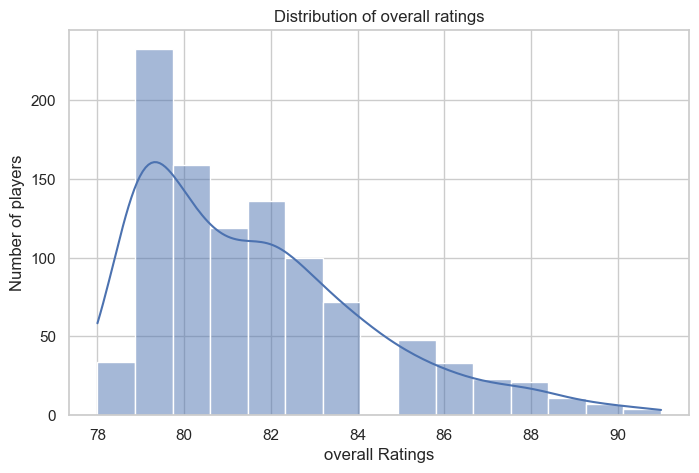

In [95]:
#plot an histogram that shows how overall ratings are spread
plt.figure(figsize=(8,5))
sns.histplot(df['overallRating'],bins=15,kde=True)
plt.title('Distribution of overall ratings')
plt.xlabel('overall Ratings')
plt.ylabel('Number of players')
plt.show()

## Skill Comparison – Top 25 % vs Others

C:\Users\USER\AppData\Local\Temp\ipykernel_116560\1661809438.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  skill_means = (df.groupby("rank_tier")[list(skill_cols.values())]


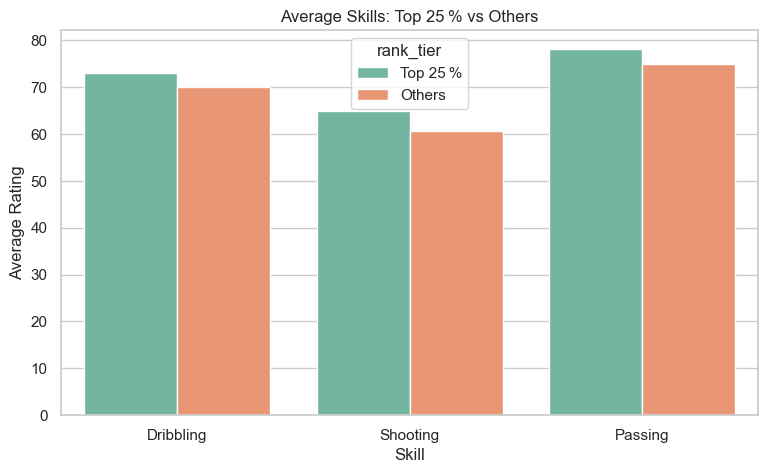

In [93]:
# we avearge dribbling/shooting/passing for the top quartile of rank(elite) and everyone else
skill_means = (df.groupby("rank_tier")[list(skill_cols.values())]
                 .mean()
                 .rename(columns={v:k for k,v in skill_cols.items()})
                 .reset_index())
melted = skill_means.melt(id_vars="rank_tier", var_name="Skill",
                          value_name="Average")
plt.figure(figsize=(9,5))
sns.barplot(data=melted, x="Skill", y="Average", hue="rank_tier", palette="Set2")
plt.title("Average Skills: Top 25 % vs Others")
plt.ylabel("Average Rating")
plt.show()


## Age vs Rating Correlation

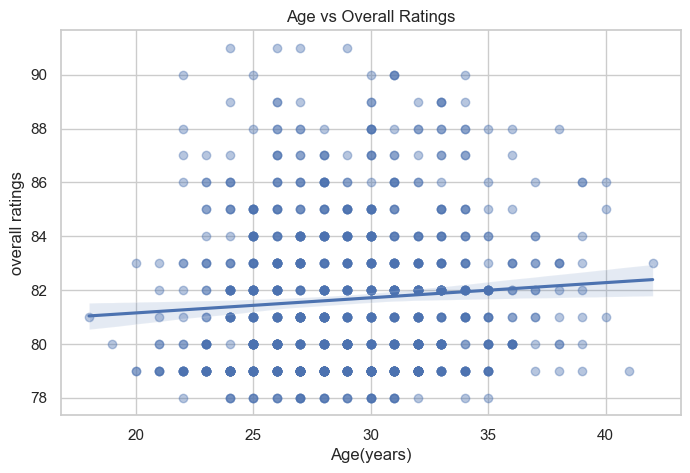

In [104]:
#Scatter + regression line — Are older players generally rated higher?
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='age',y='overallRating', scatter_kws={'alpha':0.4})
plt.title('Age vs Overall Ratings')
plt.xlabel('Age(years)')
plt.ylabel('overall ratings')
plt.show()

## Top‑10 Players & Core Skills

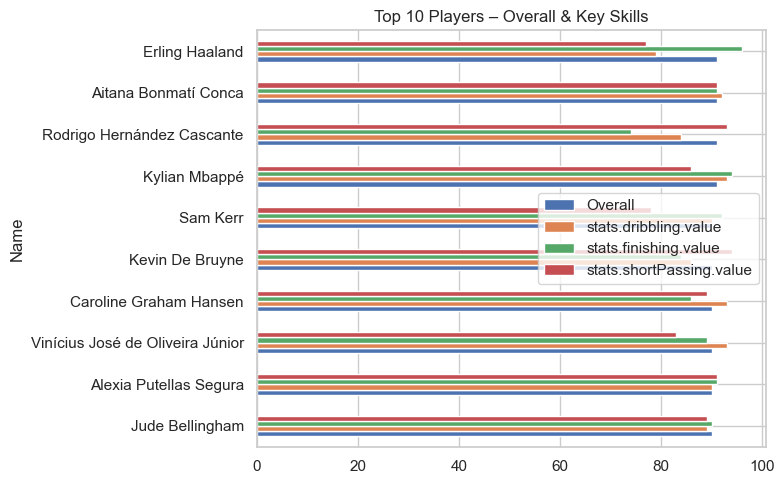

In [111]:
# we display overallratings,dribbling,shooting,passing for the ten best players
top10 = df.nlargest(10, "overallRating").copy()
top10["Name"] = top10["firstName"] + " " + top10["lastName"]

cols_to_plot = ["overallRating"] + list(skill_cols.values())
plot_df = (top10[["Name"]+cols_to_plot]
           .set_index("Name")
           .rename(columns=skill_cols | {"overallRating":"Overall"})
           .sort_values("Overall"))
plot_df.plot(kind='barh',figsize=(8,5))
plt.title("Top 10 Players – Overall & Key Skills")
plt.xlabel
plt.tight_layout()
plt.show()


## Height vs Rating

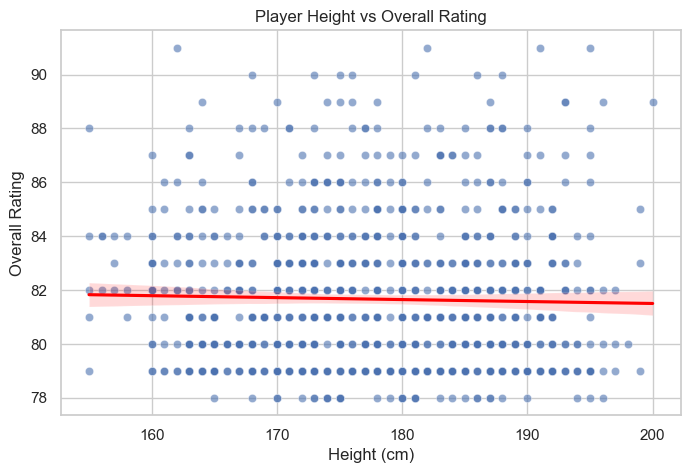

In [118]:
# Since we lack nationality, we inspect whether taller players have higher ratings.
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="height", y="overallRating", alpha=0.6)
sns.regplot(data=df, x="height", y="overallRating", scatter=False, color="red")
plt.title("Player Height vs Overall Rating")
plt.xlabel("Height (cm)"); plt.ylabel("Overall Rating")
plt.show()

## Supervised Learning
# Regression – Predict Overall Rating
# Features: Dribbling, Shooting, Passing, Age
# Model: Random Forest Regressor
# Metric: RMSE & R²

RMSE: 2.181637840903675
R²  : 0.26978184653011894


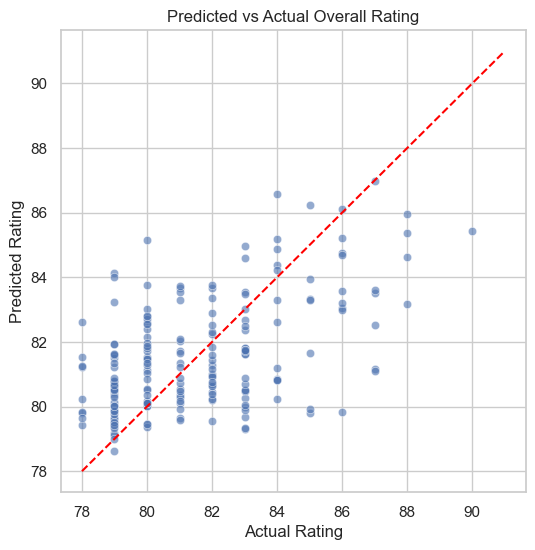

In [132]:
# CODE CELL 6
X = df[list(skill_cols.values()) + ["age"]]
y = df["overallRating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

reg = RandomForestRegressor(n_estimators=400, random_state=42)
reg.fit(X_train_s, y_train)
pred = reg.predict(X_test_s)

print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R²  :", r2_score(y_test, pred))

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red")
plt.xlabel("Actual Rating"); plt.ylabel("Predicted Rating")
plt.title("Predicted vs Actual Overall Rating")
plt.show()


## Classification – High vs Low Rating Tier
Label: High (upper 50 %) vs Low
Features: same skill trio + age + rating (optional)


Accuracy: 0.724


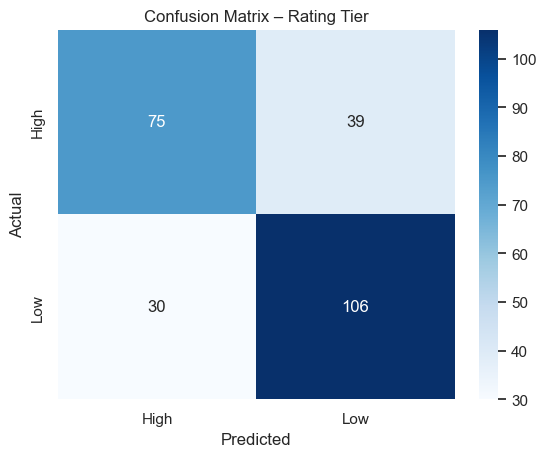

In [135]:

df["tier_label"] = pd.qcut(df["overallRating"], q=2, labels=["Low","High"])

X_cls = df[list(skill_cols.values()) + ["age"]]
y_cls = df["tier_label"]

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_cls, y_cls, stratify=y_cls, random_state=42)

scaler_c = StandardScaler()
Xc_train_s = scaler_c.fit_transform(Xc_train)
Xc_test_s  = scaler_c.transform(Xc_test)

clf = RandomForestClassifier(n_estimators=400, random_state=42)
clf.fit(Xc_train_s, yc_train)
pred_cls = clf.predict(Xc_test_s)

print("Accuracy:", accuracy_score(yc_test, pred_cls))

cm = confusion_matrix(yc_test, pred_cls, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.title("Confusion Matrix – Rating Tier"); plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.show()


##  Unsupervised Learning
K‑Means Clustering
Cluster players on skills + age + rating; visualize clusters in 2‑D PCA space.


C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8209 (\N{NON-BREAKING HYPHEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


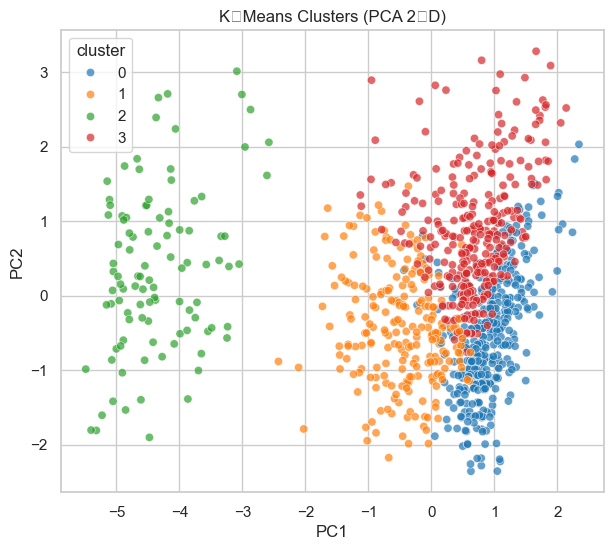

In [139]:
# CODE CELL 8
cluster_feats = list(skill_cols.values()) + ["age", "overallRating"]
Xs = df[cluster_feats]

scaler_s = StandardScaler()
Xs_s = scaler_s.fit_transform(Xs)

k = 4
km = KMeans(n_clusters=k, random_state=42)
df["cluster"] = km.fit_predict(Xs_s)

pca = PCA(n_components=2)
coords = pca.fit_transform(Xs_s)
df["PC1"], df["PC2"] = coords[:,0], coords[:,1]

plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="cluster",
                palette="tab10", alpha=0.7)
plt.title("K‑Means Clusters (PCA 2‑D)")
plt.show()


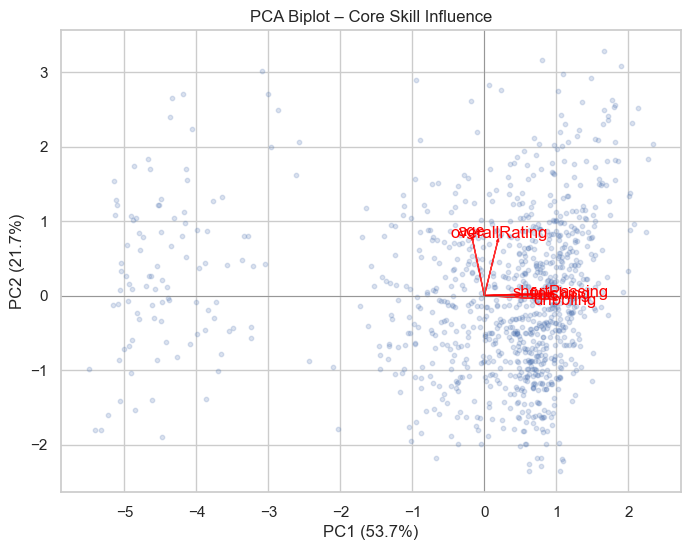

In [141]:
# PCA Biplot – Skill Drivers Reveals which variables load most on PC1/PC2.
pca_full = PCA(n_components=2).fit(Xs_s)
coords = pca_full.transform(Xs_s)
loadings = pca_full.components_.T * np.sqrt(pca_full.explained_variance_)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], alpha=0.2, s=10)

for i,col in enumerate(cluster_feats):
    plt.arrow(0,0, loadings[i,0], loadings[i,1],
              color='red', head_width=0.03, alpha=0.8)
    plt.text(loadings[i,0]*1.15, loadings[i,1]*1.15,
             col.replace("stats.","").replace(".value",""),
             color='red', ha='center', va='center')

plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA Biplot – Core Skill Influence")
plt.axhline(0,color='grey',lw=0.5); plt.axvline(0,color='grey',lw=0.5)
plt.grid(True); plt.show()


Five EDA plots (rating hist, skill comparison, age‑rating, top 10, height‑rating).

Random‑Forest regression + predicted‑vs‑actual scatter.

Random‑Forest classification for rating tiers + confusion matrix.

K‑Means clusters displayed via PCA.

PCA biplot to see which skills drive variance.